# 1. Carregando dados
- Carregando dataset
- Carregando bibliotecas
- Mostrando os primeiros registros

In [0]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Install specif version of sklearn

In [0]:
# !pip install -U scikit-learn # install latest version of sklearn if necessary
!pip install --pre -f https://sklearn-nightly.scdn8.secure.raxcdn.com scikit-learn==0.22.dev0

import sklearn 
print('The scikit-learn version is {}.'.format(sklearn.__version__))

Looking in links: https://sklearn-nightly.scdn8.secure.raxcdn.com
     |████████████████████████████████| 6.9MB 3.7MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3
The scikit-learn version is 0.22.dev0.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

low_memory = False

df = pd.read_csv('drive/My Drive/TCC/dataset/dataset.csv', sep=',') # , index_col=1

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Pré processamento e limpeza dos dados

## 1.1 Renomeação das variavéis

In [0]:
df.rename(columns = {'ScheduledDay': 'AppointmentRegistration',
                      'AppointmentDay': 'AppointmentData',
                      'Hipertension': 'Hypertension',
                      'Alcoholism': 'Alchoholism',
                      'Handcap': 'Handicap'}, inplace = True)

print(df.columns)

Index(['PatientId', 'AppointmentID', 'Gender', 'AppointmentRegistration',
       'AppointmentData', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alchoholism', 'Handicap', 'SMS_received',
       'No-show'],
      dtype='object')


## 1.2 Convertenda variaveis para data

In [0]:
df.AppointmentRegistration = df.AppointmentRegistration.apply(np.datetime64)
df.AppointmentData = df.AppointmentData.apply(np.datetime64)

print(df.AppointmentRegistration.head())
print(df.AppointmentData.head())

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: AppointmentRegistration, dtype: datetime64[ns]
0   2016-04-29
1   2016-04-29
2   2016-04-29
3   2016-04-29
4   2016-04-29
Name: AppointmentData, dtype: datetime64[ns]


## 1.3 Convertendo Id do Paciente para INT

In [0]:
df['PatientId'] = df['PatientId'].astype(np.int64)

**1.4 Nova coluna: Dias de espera até a consulta (data da consulta - data do agendamento)**

In [0]:
def absolute_and_round(number):
  number = abs(number)
  return int(np.ceil(number))
  
daysToAppointment = df.AppointmentData - df.AppointmentRegistration
daysToAppointment = daysToAppointment.apply(lambda x: x.total_seconds() / (3600 * 24))
df['AwaitingTime'] = daysToAppointment.apply(absolute_and_round)

df.head()

,PatientId,AppointmentID,Gender,AppointmentRegistration,AppointmentData,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,No-show,AwaitingTime
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1


## 1.5 Nova coluna: Paciente é masculino

In [0]:
def is_male(gender):
  if gender == 'M':
    return 1
  else:
    return 0
  
df['IsMale'] = df['Gender'].apply(is_male)

## 1.6 Nova coluna: No show em formato boolean

In [0]:
def converter_no_show(no_show):
  if no_show == 'Yes':
    return 1
  else:
    return 0
  
df['No-show-boolean'] = df['No-show'].apply(converter_no_show)

In [0]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'AppointmentRegistration',
       'AppointmentData', 'Age', 'Neighbourhood', 'Scholarship',
       'Hypertension', 'Diabetes', 'Alchoholism', 'Handicap', 'SMS_received',
       'No-show', 'AwaitingTime', 'IsMale', 'No-show-boolean'],
      dtype='object')

### **Analisando os dados nas colunas**

Se são unicos e tem alguma coisa fora do padrão

In [0]:
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alchoholism:',df.Alchoholism.unique())
print('Hypertension:',df.Hypertension.unique())
print('Handicap:',df.Handicap.unique())
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())
print('No-show:', df['No-show'].unique())
print('AwaitingTime:', sorted(df.AwaitingTime.unique()))

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alchoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No-show: ['No' 'Yes']
AwaitingTime: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 101, 102, 103, 104, 105, 107, 1

## 1.7 Removendo as idades fora do range correto

In [0]:
df = df[(df.Age >= 0) & (df.Age <= 95)]

## 1.8 Nova coluna: Faixa de idades (criança, adolescente, adulto, idoso)

In [0]:
def zone_age(age):
  if age <= 5:
    return 1
  elif age > 5 and age <= 12:
    return 2
  elif age > 12 and age <= 18:
    return 3
  elif age > 18 and age < 30:
    return 4
  elif age >= 30 and age < 60:
    return 5
  else: 
    return 6


def zone_age_label(age):
  if age <= 5:
    return 'criança até 5 anos'
  elif age > 5 and age <= 12:
    return 'criança (6 até 12)'
  elif age > 12 and age <= 18:
    return 'adolescente (13 até 18)'
  elif age > 18 and age < 30:
    return 'jovem (18 até 29)'
  elif age >= 30 and age < 60:
    return 'adulto (30 até 59)'
  else: 
    return 'idoso (mais de 60)' 


df['ZoneAge'] = df.Age.apply(zone_age)
df['ZoneAgeLabel'] = df.Age.apply(zone_age_label)

## 1.9 Nova coluna: Faixa de tempo de espera (rápido, normal, demorado, muito demorado)

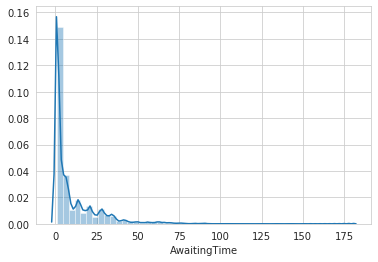

In [0]:
sns.distplot(df.AwaitingTime, bins=50)

In [0]:
def zone_awaiting(days):
  if days <= 5:
    return 1
  elif days > 5 and days <= 15:
    return 2
  elif days > 15 and days <= 60:
    return 3
  else: 
    return 4

def zone_awaiting_label(days):
  if days <= 5:
    return 'rapido'
  elif days > 5 and days <= 15:
    return 'normal'
  elif days > 15 and days <= 60:
    return 'demorado'
  else: 
    return 'muito demorado'

df['ZoneAwaitingTime'] = df.AwaitingTime.apply(zone_awaiting)
df['ZoneAwaitingTimeLabel'] = df.AwaitingTime.apply(zone_awaiting_label)

## 1.10 Nova coluna: Bairros formato numerico (convertendo bairro com label encoder)

In [0]:
# convert bairro para numeros e criando coluna de bairro int
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['NeighbourhoodNum'] = le.fit_transform(df['Neighbourhood'])

# Explorando o conjunto de dados

In [0]:
df.head()

,PatientId,AppointmentID,Gender,AppointmentRegistration,AppointmentData,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,No-show,AwaitingTime,IsMale,No-show-boolean,ZoneAge,ZoneAgeLabel,ZoneAwaitingTime,ZoneAwaitingTimeLabel,NeighbourhoodNum
0,29872499824296,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,1,0,0,6,idoso (mais de 60),1,rapido,39
1,558997776694438,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,1,1,0,5,adulto (30 até 59),1,rapido,39
2,4262962299951,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,1,0,0,6,idoso (mais de 60),1,rapido,45
3,867951213174,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,1,0,0,2,criança (6 até 12),1,rapido,54
4,8841186448183,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,1,0,0,5,adulto (30 até 59),1,rapido,39


In [0]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alchoholism,Handicap,SMS_received,AwaitingTime,IsMale,No-show-boolean,ZoneAge,ZoneAwaitingTime
count,1.104800e+05,1.104800e+05,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000,110480.000000
mean,1.474691e+14,5.675303e+06,37.063342,0.098307,0.197076,0.071841,0.030413,0.022167,0.321126,10.532657,0.350091,0.201955,4.234106,1.697239
std,2.560626e+14,7.128285e+04,23.079712,0.297731,0.397792,0.258226,0.171721,0.161252,0.466911,15.025338,0.477000,0.401461,1.575770,0.872807
min,3.921700e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
25%,4.172457e+12,5.640284e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000,1.000000
50%,3.172598e+13,5.680564e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,5.000000,1.000000
75%,9.438179e+13,5.725507e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000,0.000000,5.000000,2.000000
max,9.999816e+14,5.790484e+06,95.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,179.000000,1.000000,1.000000,6.000000,4.000000


## Quantidade de homens e mulheres

(-1.110867799344203, 1.1005175142544859, -1.11226561039089, 1.1068203914638746)

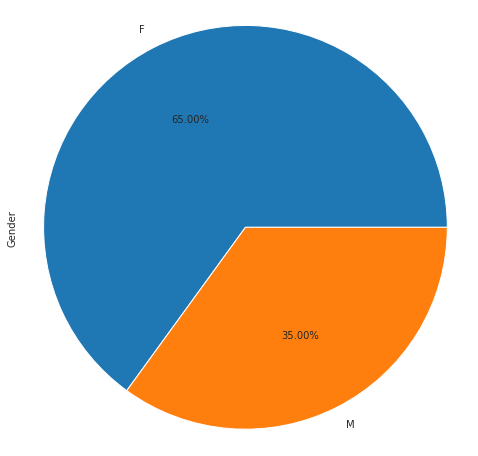

In [0]:
df['Gender'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(8,8))
plt.axis('equal')  # Para deixar o gráfico redondo

## Primeira data e ultima data do registro de uma consulta e uma consulta realizada

In [0]:
print("Data de registro da consulta")
print(df['AppointmentRegistration'].min())
print(df['AppointmentRegistration'].max())

print("Data da consulta")
print(df['AppointmentData'].min())
print(df['AppointmentData'].max())


Data de registro da consulta
2015-11-10 07:13:56
2016-06-08 20:07:23
Data da consulta
2016-04-29 00:00:00
2016-06-08 00:00:00


## Quantidade de exemplos e atributos

In [0]:
print(df.shape[0])  # gives number of row count
print(df.shape[1])  # gives number of columns

df.info()

110480
22
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 22 columns):
PatientId                  110480 non-null int64
AppointmentID              110480 non-null int64
Gender                     110480 non-null object
AppointmentRegistration    110480 non-null datetime64[ns]
AppointmentData            110480 non-null datetime64[ns]
Age                        110480 non-null int64
Neighbourhood              110480 non-null object
Scholarship                110480 non-null int64
Hypertension               110480 non-null int64
Diabetes                   110480 non-null int64
Alchoholism                110480 non-null int64
Handicap                   110480 non-null int64
SMS_received               110480 non-null int64
No-show                    110480 non-null object
AwaitingTime               110480 non-null int64
IsMale                     110480 non-null int64
No-show-boolean            110480 non-null int64
ZoneAge                  

## Contador de pacientes que foram e não foram

In [0]:
df['No-show'].value_counts()

No     88168
Yes    22312
Name: No-show, dtype: int64

(-1.1008128980357565,
 1.1000387512624161,
 -1.1012158425825715,
 1.1004711456915117)

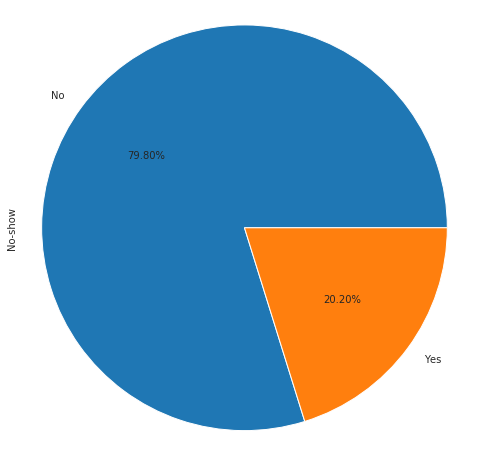

In [0]:
df['No-show'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(8,8))
plt.axis('equal')  # Para deixar o gráfico redondo

## Verificar quantidade das faixas de idades dos pacientes

(-1.106278788450182,
 1.1002989899261992,
 -1.1066762096411427,
 1.1218104117401144)

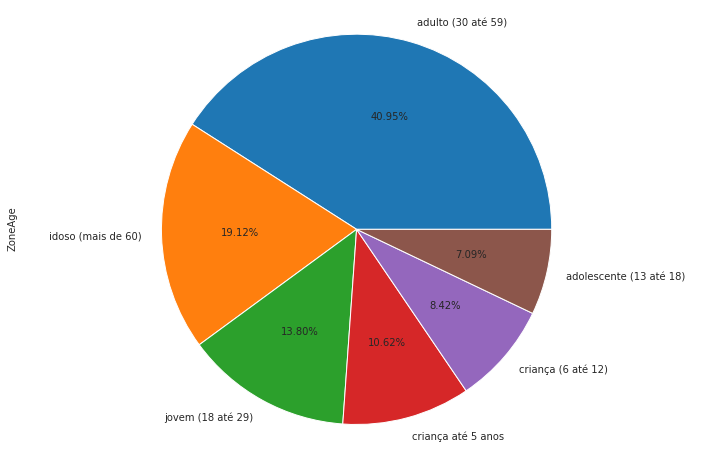

In [0]:
df['ZoneAge'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(12,8))
plt.axis('equal')  # Para deixar o gráfico redondo

## Verificar quantidade das faixas de tempo de espera

(-1.1080095749156618,
 1.1003814083293173,
 -1.1266513914121619,
 1.1116788860041433)

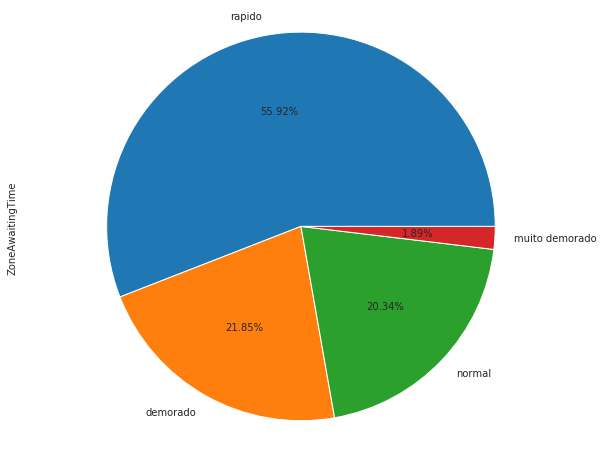

In [0]:
df['ZoneAwaitingTime'].value_counts().plot(kind='pie', autopct='%.2f%%', figsize=(10,8))
plt.axis('equal')  # Para deixar o gráfico redondo

## Probabilidade de comparecimento com atributos

**Função para validar porcentagem**

In [0]:
def probStatus(dataset, group_by):
    df1 = pd.crosstab(index = dataset[group_by], columns = dataset['No-show']).reset_index()
    df1['probShowUp'] = df1['No'] / (df1['Yes'] + df1['No'])
    return df1[[group_by, 'probShowUp']]

## Probabilidade de relação entre colunas de idade e No-show

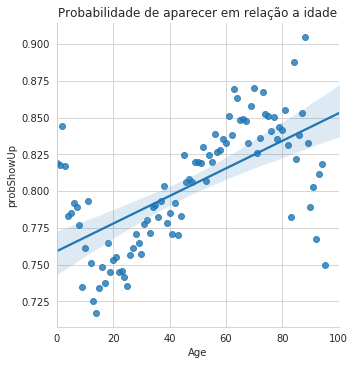

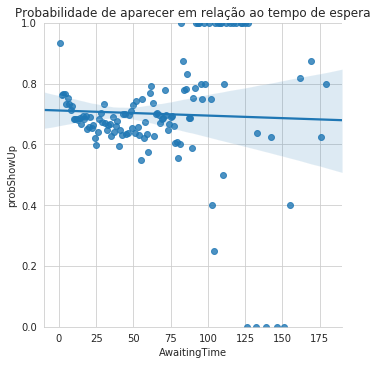

In [0]:
sns.lmplot(data = probStatus(df, 'Age'), x = 'Age', y = 'probShowUp', fit_reg = True)
plt.xlim(0, 100)
plt.title('Probabilidade de aparecer em relação a idade')
plt.show()


sns.lmplot(data = probStatus(df, 'AwaitingTime'), x = 'AwaitingTime', 
           y = 'probShowUp', fit_reg = True)
plt.title('Probabilidade de aparecer em relação ao tempo de espera')
plt.ylim(0, 1)
plt.show()

## Probablidade de faltar em relação com as doenças

In [0]:
def prob_status_categorical(group_by):
    rows = []
    for item in group_by:
        for level in df[item].unique():
            row = {'Condition': item}
            total = len(df[df[item] == level])
            n = len(df[(df[item] == level) & (df['No-show'] == 'No')])
            row.update({'Level': level, 'Probability': n / total})
            rows.append(row)
    return pd.DataFrame(rows)

### Probilidade de comparecer em relação as doenças e escolaridade (Coluna verde: Não/ Coluna laranja: Sim)

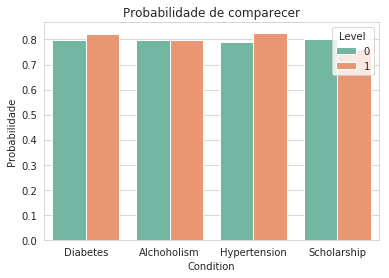

In [0]:
sns.barplot(data = prob_status_categorical(['Diabetes', 'Alchoholism', 'Hypertension',
                                          'Scholarship']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')

plt.title('Probabilidade de comparecer')
plt.ylabel('Probabilidade')
plt.show()

## Relação de não comparecimento com o avisos SMS

In [0]:
prb_sms = prob_status_categorical(['SMS_received'])
prb_sms.head()

,Condition,Level,Probability
0,SMS_received,0,0.832964
1,SMS_received,1,0.724223


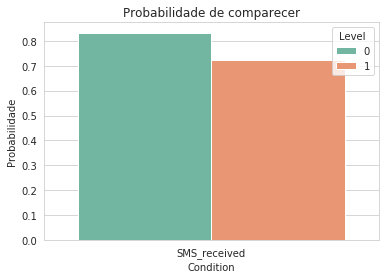

<Figure size 1080x720 with 0 Axes>

In [0]:
sns.barplot(data = prob_status_categorical(['SMS_received']),
             x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')

plt.title('Probabilidade de comparecer')
plt.ylabel('Probabilidade')
plt.figure(figsize=(15,10))
plt.show()

## Probabilidade de comparecer em relação quantidade de deficiencias

In [0]:
prb_def = prob_status_categorical(['Handicap'])
prb_def.head()

,Condition,Level,Probability
0,Handicap,0,0.797613
1,Handicap,1,0.821534
2,Handicap,2,0.796703
3,Handicap,3,0.769231
4,Handicap,4,0.666667


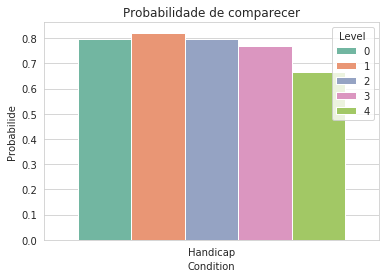

In [0]:
sns.barplot(data = prob_status_categorical(['Handicap']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')

plt.title('Probabilidade de comparecer')
plt.ylabel('Probabilide')
plt.show()

## Relação de genero com o comparecimento

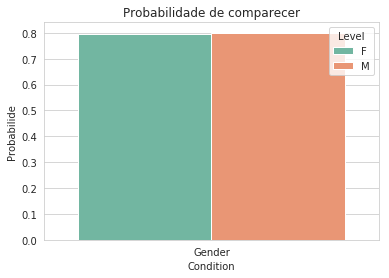

In [0]:
sns.barplot(data = prob_status_categorical(['Gender']),
            x = 'Condition', y = 'Probability', hue = 'Level', palette = 'Set2')

plt.title('Probabilidade de comparecer')
plt.ylabel('Probabilide')
plt.show()

**Pacientes com consultas anteriores**

Pacientes com mais de uma consulta.

In [0]:
df_group = (df.groupby(['PatientId', 'No-show']).size()
   .sort_values(ascending=False)
   .reset_index(name='count'))

print(df_group.info())

# df_group[df_group['count'] > 1]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71778 entries, 0 to 71777
Data columns (total 3 columns):
PatientId    71778 non-null int64
No-show      71778 non-null object
count        71778 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.6+ MB
None


In [0]:
df_group = (df.groupby(['PatientId']).size()
   .sort_values(ascending=False)
   .reset_index(name='count'))

print(df_group.info())

print(df_group.shape[0])  # gives number of row count
print(df_group.shape[1])  # gives number of columns


df_group[df_group['count'] > 1]

# Aplicação dos algoritmos

### Criando função para plotar gráfico de matriz de confusão

In [0]:
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

np.set_printoptions(precision=2)

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Classe verdadeira',
           xlabel='Classe predita')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Não supervisionados

#### K Means


1.   Treinamento 
2.   Analise das metricas



In [0]:
from sklearn.cluster import KMeans

clusters = 2
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ZoneAge', 'Hypertension', 'Diabetes', 
                'Alchoholism', 'Handicap', 'SMS_received', 'ZoneAwaitingTime', 'NeighbourhoodNum']].iloc[:len(df)]

kmeans.fit(df_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(df['No-show-boolean'], kmeans.labels_))
print('\n')
print(classification_report(df['No-show-boolean'], kmeans.labels_))

[[65649 22519]
 [15965  6347]]


              precision    recall  f1-score   support

           0       0.80      0.74      0.77     88168
           1       0.22      0.28      0.25     22312

    accuracy                           0.65    110480
   macro avg       0.51      0.51      0.51    110480
weighted avg       0.69      0.65      0.67    110480



## Supervisionados

In [0]:
df.loc[df['Neighbourhood'] == 'JARDIM CAMBURI']['NeighbourhoodNum'].head(1)

72    38
Name: NeighbourhoodNum, dtype: int64

In [0]:
pacient_fake1 = np.array([1, 4, 0, 0, 0, 0, 1, 1, 38]) # masc, jovem, no hypertension, no diabetes, no alcholism, no handicap, sms recived, rapido, JARDIM CAMBURI
pacient_fake2 = np.array([0, 1, 0, 0, 0, 0, 0, 4, 38]) # fem, criança até 5 anos, no hypertension, no diabetes, no alcholism, no handicap, no sms recived, muito demorado, JARDIM CAMBURI
pacient_fake1_n = [4, 1, 1]
pacient_fake2_n = [1, 0, 4]

print(pacient_fake2)

[ 0  1  0  0  0  0  0  4 38]


### Naive Bayes


1.   Separar o dataset em parte de treino e test (70% e 30%)
2.   Treinar o algoritmo
3.   Ver métricas



In [0]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

df_naive = df[['IsMale', 'ZoneAge', 'Hypertension', 'Diabetes', 
               'Alchoholism', 'Handicap', 'SMS_received', 'ZoneAwaitingTime', 'NeighbourhoodNum']].iloc[:len(df)]

df_naive = df[['ZoneAge', 'SMS_received', 'ZoneAwaitingTime']].iloc[:len(df)]

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_naive, df['No-show-boolean'], test_size=0.3, random_state=109) # 70% training and 30% test

In [0]:
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7837315954622255


Confusion matrix, without normalization
[[25684   691]
 [ 6477   292]]


[]

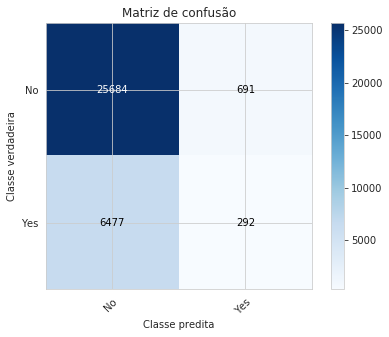

In [0]:
ax = plot_confusion_matrix(y_test, y_pred, classes=np.array(['No', 'Yes']),
                      title='Matriz de confusão')
ax.plot()

In [0]:
print(gnb.predict([pacient_fake1_n, pacient_fake2_n]))

[0 1]


#### With standard scaler 

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# normalize data with StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_naive)

X_train, X_test, y_train, y_test = train_test_split(scaled_data, df['No-show-boolean'], test_size=0.3, random_state=109) # 70% training and 30% test

gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = gnb.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7837315954622255


### Neural Network

**Funções de ativações utilizadas:**

1.   linear
2.   sigmoidal : sigmoid

**Camadas:**

- layer.get_weights() : pegar pesos da camada
- layer.set_weights(np.array([0.1, 0.1]) : setar peso da camada

1.   Dense
2.   Dropout
3.   Activation

**Optimizers:**

1.   SGD: keras.optimizers.SGD(lr=0.01, nesterov=True)
2.   ADAM: keras.optimizers.Adam(lr=0.001)



In [0]:
import tensorflow as tf
import tensorflow.keras as keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = df[['IsMale', 'ZoneAge', 'Hypertension', 'Diabetes', 
              'Alchoholism', 'Handicap', 'SMS_received', 'ZoneAwaitingTime', 'NeighbourhoodNum']].iloc[:len(df)] 

# x = df[['ZoneAge', 'SMS_received', 'ZoneAwaitingTime']].iloc[:len(df)] # some variables

y = df['No-show-boolean'].iloc[:len(df)]

In [0]:
x = np.array(x).astype(float)
y = np.array(y)

# normalize the dataset - 0 until 1
scaler = StandardScaler()
x = scaler.fit_transform(x)

model = Sequential()
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

# Compile
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=109)

# Fit the model
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
77336/77336 [==============================] - 3s 45us/step - loss: 0.4830 - acc: 0.7984
Epoch 2/30
77336/77336 [==============================] - 4s 45us/step - loss: 0.4739 - acc: 0.7990
Epoch 3/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4716 - acc: 0.7991
Epoch 4/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4709 - acc: 0.7990
Epoch 5/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4704 - acc: 0.7990
Epoch 6/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4702 - acc: 0.7991
Epoch 7/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4694 - acc: 0.7990
Epoch 8/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4687 - acc: 0.7989
Epoch 9/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4685 - acc: 0.7992
Epoch 10/30
77336/77336 [==============================] - 3s 42us/step - loss: 0.4684 - acc: 0.7990

In [0]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

33144/33144 [==============================] - 1s 21us/step
0.46860814197409306
0.795860487583781


In [0]:
print(model.predict_classes(pacient_fake2.reshape(1, -1)))

[[0]]


### Arvores de decisão - [Decision Tree](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier)

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# df_tree = df[['IsMale', 'ZoneAge', 'Hypertension', 'Diabetes', 
#              'Alchoholism', 'Handicap', 'SMS_received', 'ZoneAwaitingTime', 'NeighbourhoodNum']].iloc[:len(df)]

df_tree = df[['ZoneAge', 'SMS_received', 'ZoneAwaitingTime']].iloc[:len(df)]

x_train, x_test, y_train, y_test = train_test_split(df_tree, df['No-show-boolean'], test_size=0.3, random_state=100)

#### Árvore sem poda

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26387
           1       0.58      0.00      0.00      6757

    accuracy                           0.80     33144
   macro avg       0.69      0.50      0.45     33144
weighted avg       0.75      0.80      0.71     33144



Qtd nodes: 95


Confusion matrix, without normalization
[[26377    10]
 [ 6743    14]]


[]

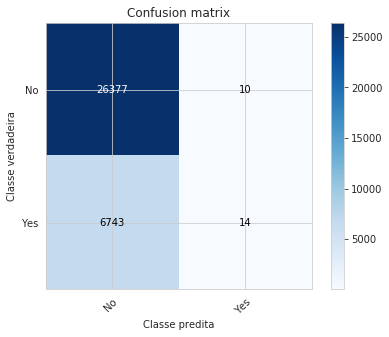

In [0]:
decision_tree_clf = DecisionTreeClassifier(criterion='entropy')

decision_tree_clf.fit(x_train, y_train)

pred = decision_tree_clf.predict(x_test)

print(classification_report(y_test, pred))
print('\n')
print('Qtd nodes:', decision_tree_clf.tree_.node_count)
print('\n')

cfm = plot_confusion_matrix(y_test, pred, classes=np.array(['No', 'Yes']),
                      title='Confusion matrix')

cfm.plot()

**Árvore gerada sem poda**

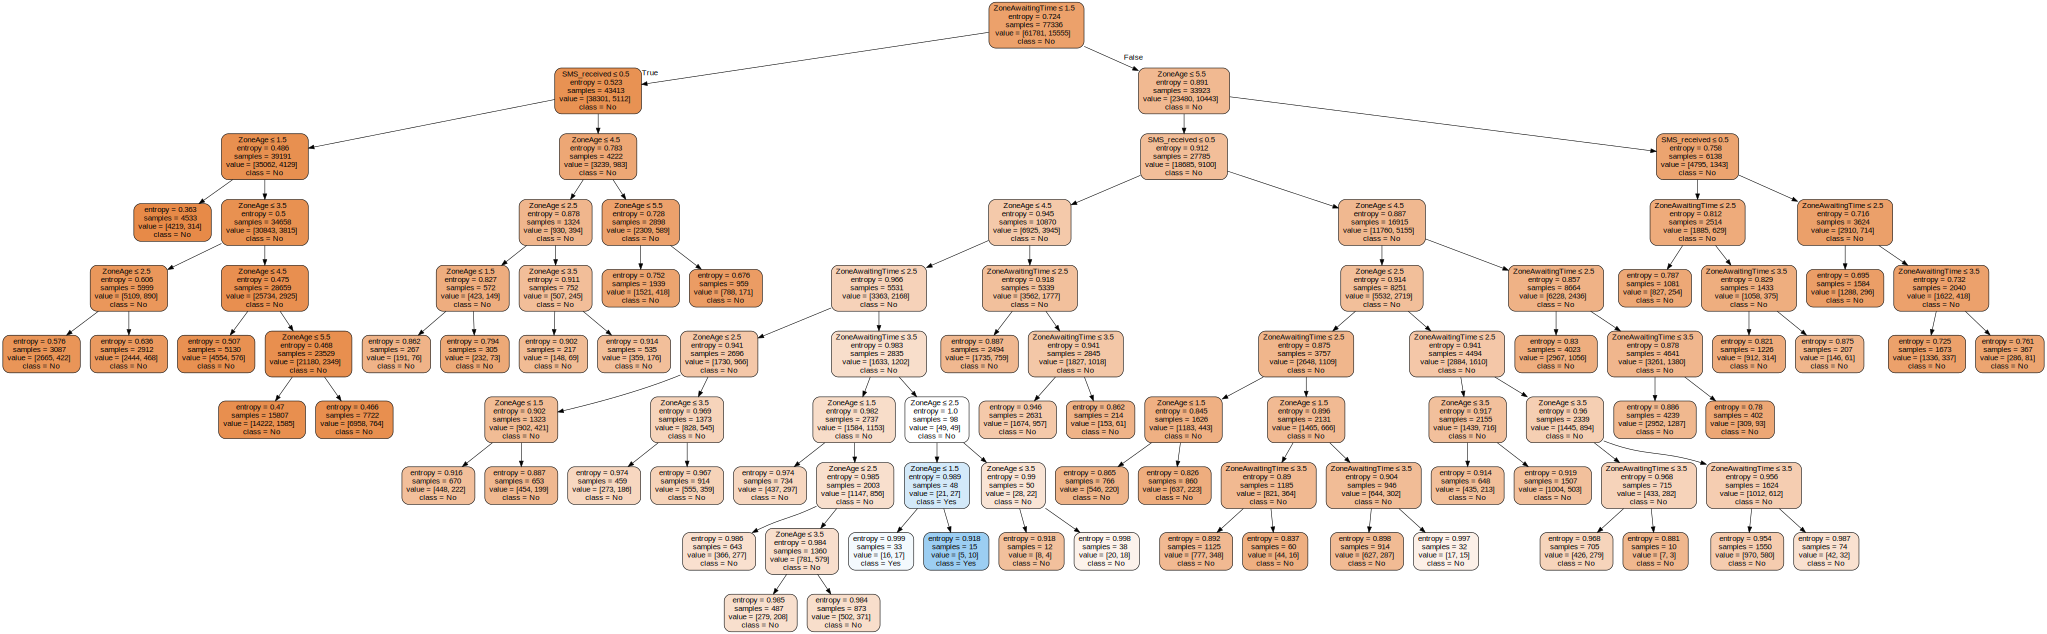

In [0]:
import graphviz 

dot_data = tree.export_graphviz(decision_tree_clf, out_file=None, 
                     feature_names=list(df_tree.columns),  
                     class_names=['No', 'Yes'],  
                     filled=True, rounded=True,  
                     special_characters=True) 
graph = graphviz.Source(dot_data)  
graph

In [0]:
decision_tree_clf.predict([pacient_fake1_n, pacient_fake2_n])

array([0, 1])

#### Árvore com poda

Retirando o valor ideal (ccp_alpha) da poda - [Prunning complexity](https://scikit-learn.org/dev/auto_examples/tree/plot_cost_complexity_pruning.html#sphx-glr-auto-examples-tree-plot-cost-complexity-pruning-py)

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

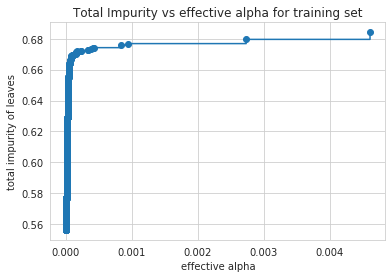

In [0]:
clf_pruning = DecisionTreeClassifier(criterion='entropy')
path = clf_pruning.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

---

In [0]:
alpha = 0.001
d_tree_prunning_clf = DecisionTreeClassifier(criterion='entropy', ccp_alpha=alpha)

d_tree_prunning_clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     26387
           1       0.00      0.00      0.00      6757

    accuracy                           0.80     33144
   macro avg       0.40      0.50      0.44     33144
weighted avg       0.63      0.80      0.71     33144



Qtd nodes: 7


Confusion matrix, without normalization
[[26387     0]
 [ 6757     0]]


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1252: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[]

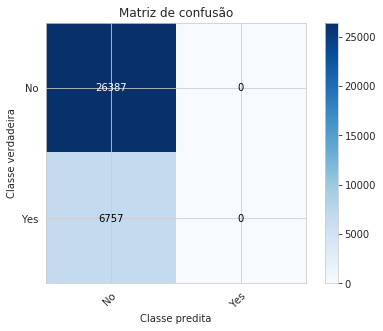

In [0]:
pred_prunning = d_tree_prunning_clf.predict(x_test)

print(classification_report(y_test, pred_prunning))
print('\n')
print('Qtd nodes:', d_tree_prunning_clf.tree_.node_count)
print('\n')

poda_tree_plt = plot_confusion_matrix(y_test, pred_prunning, classes=np.array(['No', 'Yes']),
                      title='Matriz de confusão')

poda_tree_plt.plot()

**Árvore gerada com poda**

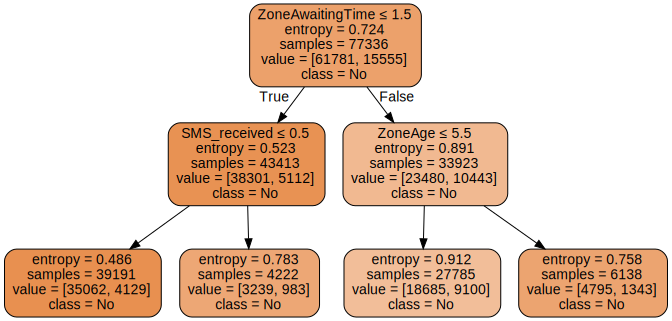

In [0]:
import graphviz 
from sklearn import tree

dot_data = tree.export_graphviz(d_tree_prunning_clf, out_file=None, 
                     feature_names=list(df_tree.columns),
                     leaves_parallel=True,
                     class_names=['No', 'Yes'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  
graph

In [0]:
d_tree_prunning_clf.predict([pacient_fake1, pacient_fake2])

array([0, 0])